<a href="https://www.kaggle.com/madeelbadar/wine-dataset?scriptVersionId=89629758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

***In this project I use machine learning to forecast the quality of a given wine using a number of feautures such as acidity and bitterness***

In [1]:
#imporing all the neccesary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install xgboost


In [2]:
#setting df as equal to the csv file that includes all the wine data
df=pd.read_csv('../input/wine-quality-dataset/WineQT.csv')

In [3]:
#prints shape of the dataframe
df.shape

(1143, 13)

In [4]:
#setting the index to column labeled id
df=df.set_index(['Id'])

In [5]:
#the first few rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#counts all the values that are attributed to a certain value in the quality column
value_count=df['quality'].value_counts()

In [7]:
#prints the count of values attributed to each number in the quality column
value_count.head()

5    483
6    462
7    143
4     33
8     16
Name: quality, dtype: int64

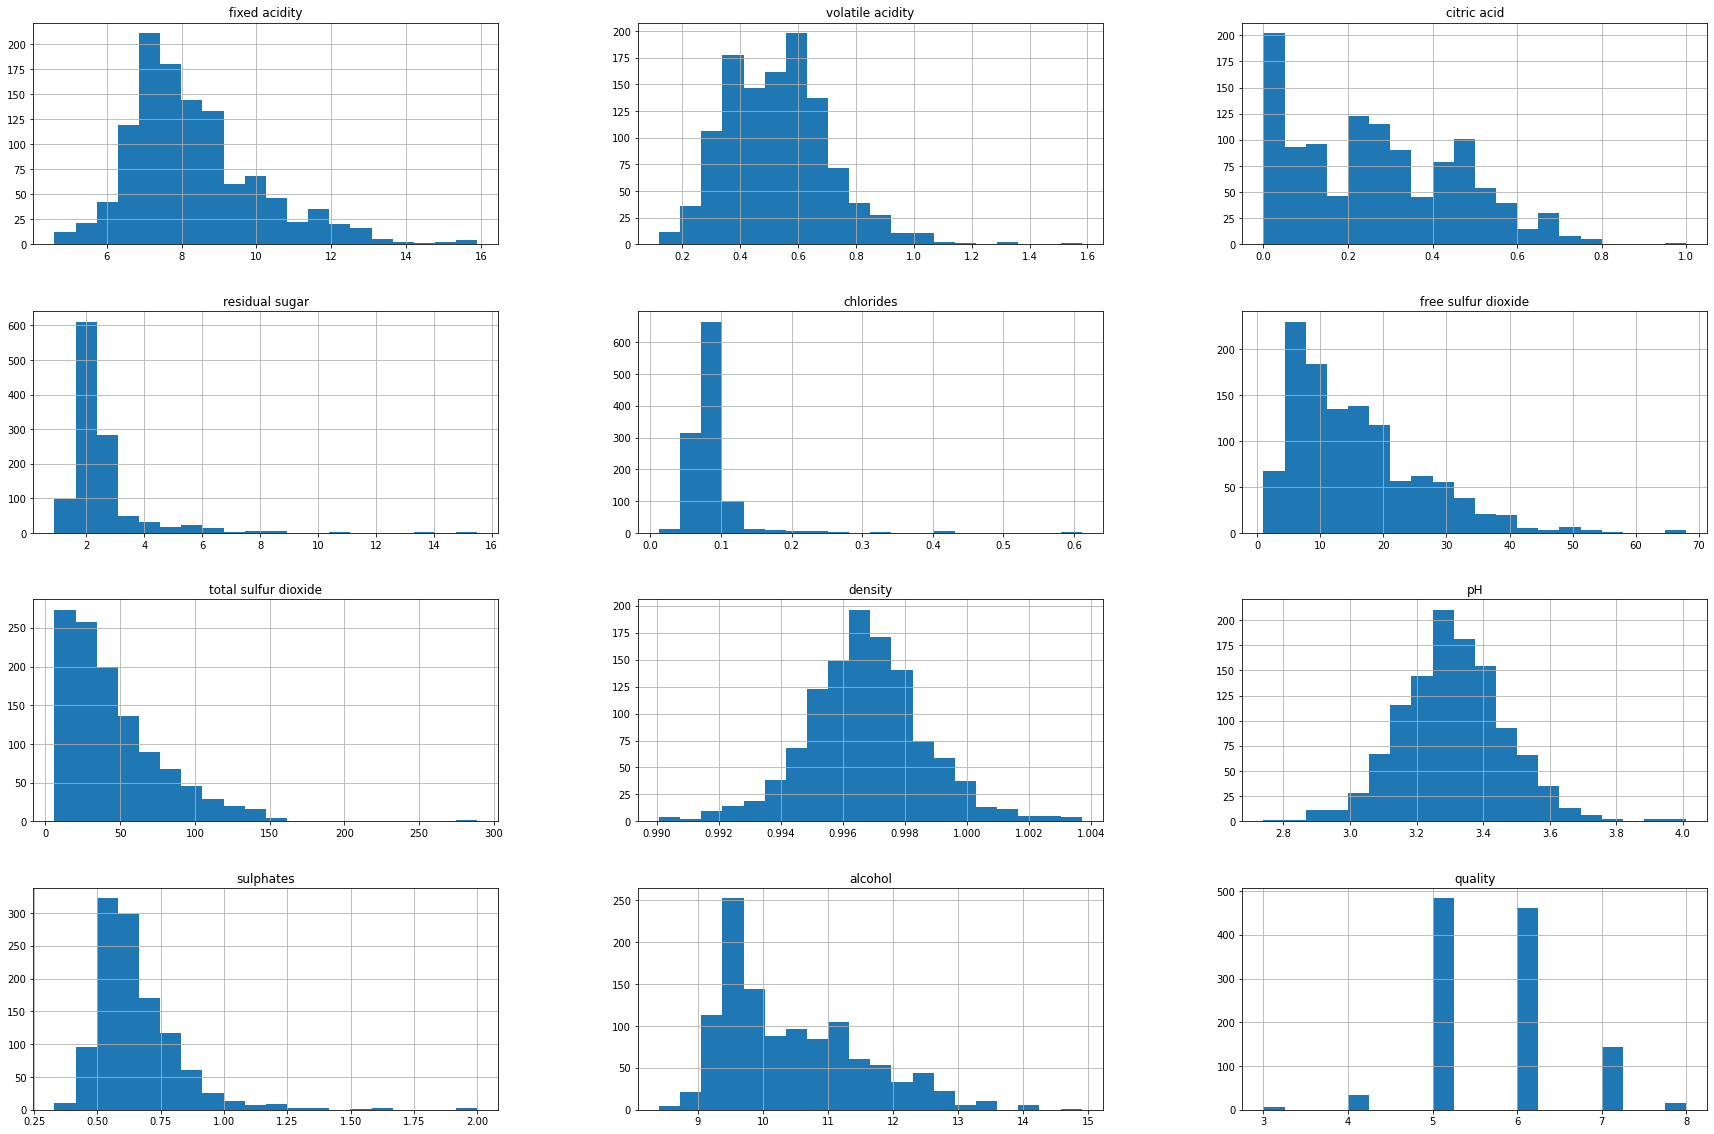

In [8]:
#histogram that shows the structure of each column in our data
df.hist(bins=20, figsize=(30,20)) 

plt.rcParams['savefig.facecolor']='white'
plt.savefig('foo1.png',bbox_inches='tight')
plt.show()


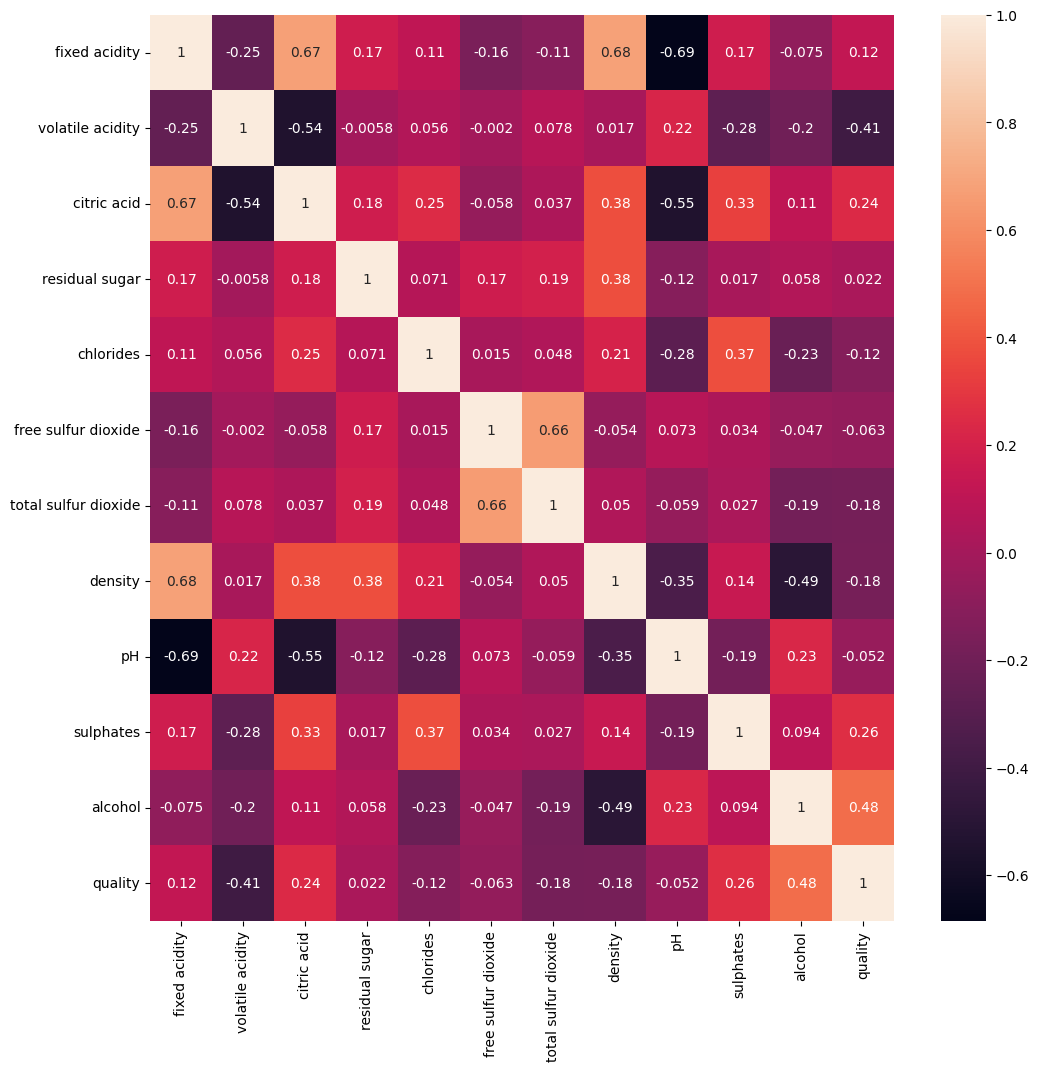

In [9]:
#correlation matrix helps us gauge how much correlation columns have with one another
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=100)

x = df.corr()
sns.heatmap(x, annot=True)

plt.rcParams['savefig.facecolor']='white'
plt.savefig('foo.png',bbox_inches='tight')


In [10]:
#prints all the columns in our data
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
#we will take the attributes in the quality column and use them to create a new column 
#called rating that will help us split our where if the value in rating is one the wine is bad
# 2 indicates the wine is decent and 3 indicates it is good
reviews = []
for i in df['quality']:
    if i >= 3 and i <= 4:
        reviews.append(1)
    elif i >= 5 and i <= 6:
        reviews.append(2)
    elif i >= 7 and i <= 8:
        reviews.append(3)
df['rating'] = reviews

In [12]:
#we are splitting our data into features a labelels
x = df.iloc[:,:-2]
y = df['rating']

In [13]:
#we are preprocessing the data so that the values are between (-1 and 1) 
#this helps our machine learning model train faster and not be thrown off by outliers
sc = StandardScaler()
x = sc.fit_transform(x)


In [14]:
#using our features and labels to split data between test and train sets where 25% of our set will be reserved for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [15]:
#shape of our training and testing features and labels 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(857, 11)
(857,)
(286, 11)
(286,)


In [16]:
#here we import our classifier and our models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, x_train, y_train, cv=10)
scores=np.mean(scores)
print(scores)

0.8658686730506157


In [18]:
scores = cross_val_score(xgb, x_train, y_train, cv=10)
scores=np.mean(scores)
print(scores)

[04:03:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:03:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:03:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:03:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:03:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [19]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rscv = RandomizedSearchCV(rfc, random_state=0,param_distributions=random_grid, n_iter = 20, cv = 3, verbose=2,n_jobs=-1)

In [20]:
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   54.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [21]:
scores = cross_val_score(rscv, x_train, y_train, cv=10)
scores=np.mean(scores)
print(scores)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.9s


[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=   3.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=   2.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.9s
[CV] n_estimators=

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.0s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   1.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   2.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   2.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=   3.2s
[CV] n_estimators=800, m

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.7s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.2s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=   3.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=   2.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.3s
[CV] n_estimators=800, 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.2s



[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.3s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, total=   5.8s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=   4.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.9s
[CV] n_estimators

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.9s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.8s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   3.8s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.1s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, total=   5.8s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=   4.8s
[CV] n_estima

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.7s



[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   2.9s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.9s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   4.1s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, total=   4.4s
[CV] n_estima

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.1s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.6s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.3s



[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   5.6s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, total=   5.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=   1.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimat

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.9s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   1.4s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=   3.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.8s
[CV] n_estimators

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.8s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s



[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.4s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=   4.3s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   4.2s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True, total=   2.7s
[CV] n_estimators=600

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.9s finished


0.8658686730506157


In [22]:
#we will be using random forest since it is quick and yiels a very good result
#the model accurace is excellent at 88 percent
rfc_predict=rscv.predict(x_test)
print(accuracy_score(y_test,rfc_predict)*100)


86.7132867132867


In [23]:
#here i am creating a hypothetical wine to see how it would be rated 
#I get a 2 so maybe going into wine making isn't for me
new_wine={'fixed acidity': [2], 'volatile acidity': [5],'citric acid':[7],'residual sugar':[2],'chlorides':[9],'free sulfur dioxide':[6],'total sulfur dioxide':[5],'density':[2],'pH':[5],'sulphates':[4],'alcohol':[6]} 
new_wine = pd.DataFrame(new_wine)  
new_wine_predict=rscv.predict(new_wine)
print(new_wine_predict)

[2]
